## importing Libraries

In [2]:

import numpy as np # for using array 
import pandas as pd # making the data frames
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #plotting graphs
import random  
from sklearn.utils import shuffle # shuffling the data
import nltk # dealing with strings
import re
from wordcloud import WordCloud #visualizing word cloud(bag of words)
%matplotlib inline 

#### the data we will train our model on is devided into Fake And true 
     so we will read each file in data frame

In [3]:
#loading data
fake_data=pd.read_csv(r"C:\Users\hmyeh\Downloads\ApplAI\Fake News Detection\Fake.csv")
true_data=pd.read_csv(r"C:\Users\hmyeh\Downloads\ApplAI\Fake News Detection\True.csv")

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


here, we see that the dataset isnt labled so, we will add column label before concatinating true and fake news

In [5]:
#adding fake label
fake_data['news status']= 'Fake'

In [6]:
fake_data.head() #exploring the dataset

,title,text,subject,date,news status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [7]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


##### later on we will concat the true and fake data together so we must label them first

In [8]:
#adding true label
true_data['news status']='True' 

In [9]:
true_data.head()

,title,text,subject,date,news status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


##### quick view on our values

In [10]:
true_data['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [11]:
fake_data['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

##### our data shape

In [12]:
fake_data.shape

(23481, 5)

In [13]:
true_data.shape

(21417, 5)

## data analysis
    in the below plots we will try to extract some information from the dataset and understand it well to be able to take
    right decisons later on with the features we will deal with

<AxesSubplot:xlabel='subject', ylabel='count'>

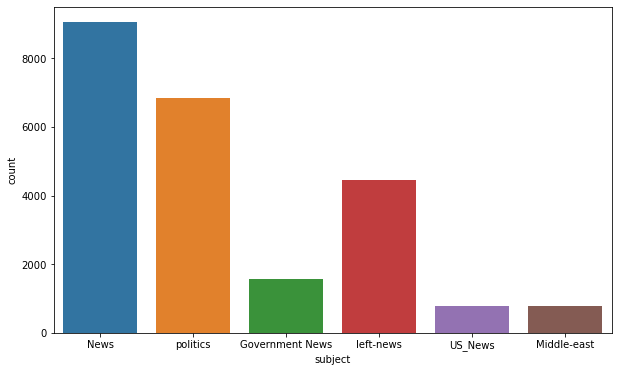

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake_data) #plotting the diffrent subjects in fake data

##### most of our data subjects are politics news 

<AxesSubplot:xlabel='subject', ylabel='count'>

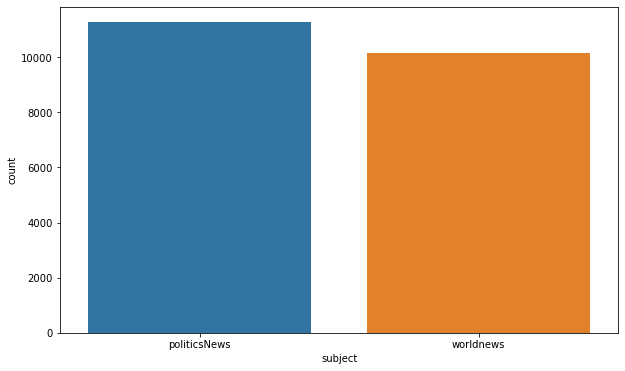

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=true_data) #plotting the diffrent subjects in true data

### Word Clouds


#### word clouds simply show which words was found more frequently in the data set

In [16]:
text=' '.join(fake_data['text'].tolist()) #

<function matplotlib.pyplot.show(close=None, block=None)>

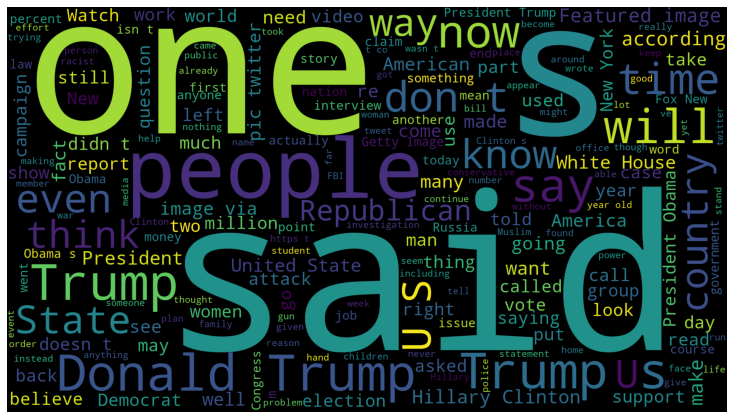

In [17]:
wordcloud=WordCloud(width=1920,height=1080).generate(text) 
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

<AxesSubplot:xlabel='subject', ylabel='count'>

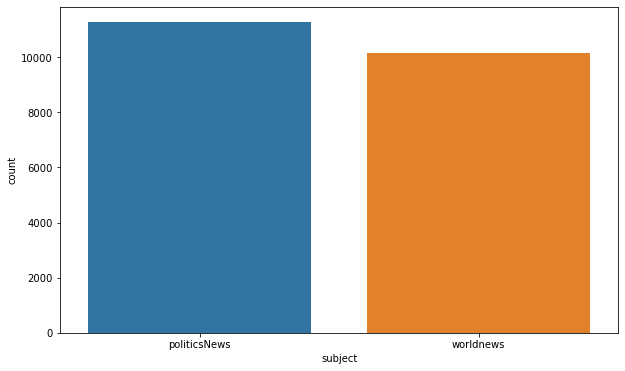

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=true_data)

In [19]:
Rtext=' '.join(true_data['text'].tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

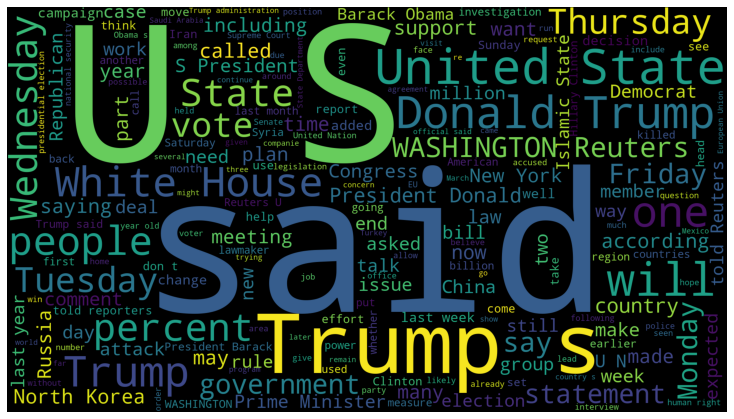

In [20]:
wordcloud=WordCloud(width=1920,height=1080).generate(Rtext) 
fig=plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [21]:
true_data.head()

,title,text,subject,date,news status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


## text diffrences
there is a important information we can can conclude from the diffrence of real and fake texts

Real news seems to have source of publication which is not present in fake news data as example:

- "WASHINGTON(Reuters)"
- only few texts in real data dont have publication info

